#Proyecto Semestral Estaca

In [2]:
# Librerías necesarias
import pandas as pd
import numpy as np

#import seaborn as sns
#from sklearn.model_selection import train_test_split
# Las comentadas son para futuro uso pero aún no son están en uso

In [ ]:
# Nota  
#Este notebook requiere tener instaladas las siguientes librerías:  
#`pandas`, `numpy`, `matplotlib`, `seaborn`, `scikit-learn`, `notebook`  
#Si no las tienes, ejecuta en la terminal:
#`pip install pandas numpy matplotlib seaborn scikit-learn notebook`

In [3]:
#Lee el archivo de la database
df = pd.read_csv("stroke-dataset.csv")

In [4]:
#Muestra los cinco primeros datos de la database
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [5]:
#Muestra el tipo de dato de cada atributo
df.dtypes

id                     int64
gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

In [6]:
#Verifica la cantidad de datos NaN según categoría
df.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [7]:
#Cantidad de filas en el dataset antes de eliminación de NaN
len(df) 

5110

In [8]:
#Eliminar filas que contienen valores NaN  
df = df.dropna(axis=0)

In [9]:

#Cantidad de filas en el dataset post eliminación de NaN
len(df) 


4909

In [10]:
#Revisar si hay datos duplicados (no los borra en caso de existir)
duplicados = df.duplicated()
print(df[duplicados])

Empty DataFrame
Columns: [id, gender, age, hypertension, heart_disease, ever_married, work_type, Residence_type, avg_glucose_level, bmi, smoking_status, stroke]
Index: []


In [11]:
#Verifica edades dentro de rangos válidos
pruebaage=df[df['age']>100]
print(pruebaage)

Empty DataFrame
Columns: [id, gender, age, hypertension, heart_disease, ever_married, work_type, Residence_type, avg_glucose_level, bmi, smoking_status, stroke]
Index: []


In [ ]:
#Muestra si se conoce o no si es que fuma
fumadores_desconocidos = df[df["smoking_status"] == "Unknown"]
print(fumadores_desconocidos)

         id  gender   age  hypertension  heart_disease ever_married work_type  \
9     60491  Female  78.0             0              0          Yes   Private   
23    64778    Male  82.0             0              1          Yes   Private   
31    33879    Male  42.0             0              0          Yes   Private   
38    47306    Male  58.0             0              0           No   Private   
67    72366    Male  76.0             0              0          Yes   Private   
...     ...     ...   ...           ...            ...          ...       ...   
5098    579    Male   9.0             0              0           No  children   
5101  36901  Female  45.0             0              0          Yes   Private   
5103  22127  Female  18.0             0              0           No   Private   
5104  14180  Female  13.0             0              0           No  children   
5109  44679  Female  44.0             0              0          Yes  Govt_job   

     Residence_type  avg_gl

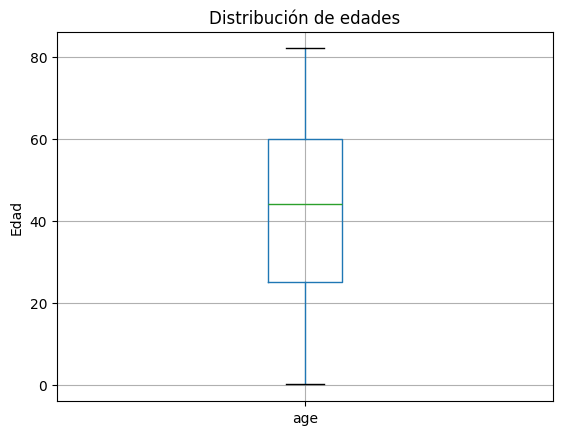

In [16]:
#pip install matplotlib
import matplotlib.pyplot as plt
df.boxplot(column='age')
plt.title('Distribución de edades')
plt.ylabel('Edad')

plt.show()

In [17]:
#Mostrar outliers
Q1 = df["bmi"].quantile(0.25)
Q3 = df["bmi"].quantile(0.75)
IQR = Q3 - Q1
limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR
print(limite_inferior, limite_superior)
outliers = df[(df["bmi"] < limite_inferior) | (df["bmi"] > limite_superior)]
print(outliers)

9.099999999999998 47.5
         id  gender   age  hypertension  heart_disease ever_married  \
21    13861  Female  52.0             1              0          Yes   
113   41069  Female  45.0             0              0          Yes   
254   32257  Female  47.0             0              0          Yes   
258   28674  Female  74.0             1              0          Yes   
270   72911  Female  57.0             1              0          Yes   
...     ...     ...   ...           ...            ...          ...   
4858   1696  Female  43.0             0              0          Yes   
4906  72696  Female  53.0             0              0          Yes   
4952  16245    Male  51.0             1              0          Yes   
5009  40732  Female  50.0             0              0          Yes   
5057  38349  Female  49.0             0              0          Yes   

          work_type Residence_type  avg_glucose_level   bmi   smoking_status  \
21    Self-employed          Urban          

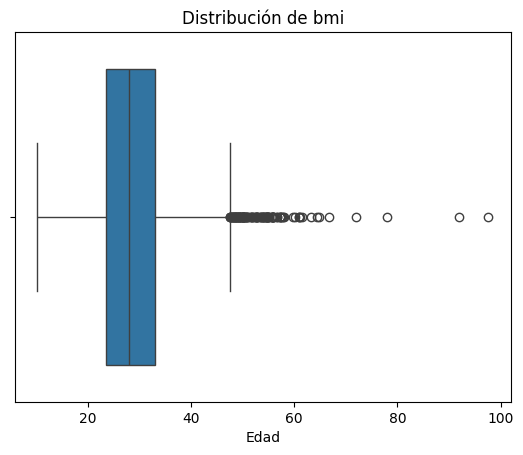

In [14]:
import seaborn as sns

sns.boxplot(x=df['bmi'])
plt.title('Distribución de bmi')
plt.xlabel('Edad')
plt.show()
